# 1 - Introduction

Name : Gilang Wiradhyaksa

Data : [Flight Price](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction)

Objective : The purpose of this project is to create a machine learning to predict flight price of some airlines in India. Data set used is flight price prediction from kaggle. The regression model used in this project is `KNN`, `SVM`, `Decision Tree`, `Random Forest` and `AdaBoost`.

# 2 - Import Libraries

In [405]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import pickle

# 3 - Data Loading

In [406]:
#Data Asli
df_ori = pd.read_csv('flight_price_prediction.csv', index_col=0)

In [407]:
df = df_ori.copy()
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [409]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [410]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [411]:
# Check duplicated data
df.duplicated().sum()

0

In [412]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

# 4 - Exploratory Data Analysis (EDA)

In [413]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## 4.1 Target Column

In [414]:
def exploreNumCol(df,  col):
    mean = df[col].mean()
    median = df[col].median()
    modus = df[col].mode().values[0]

    min = df[col].min()
    max = df[col].max()

    print(f'Mean {col} = {mean:.2f}')
    print(f'Median {col} = {median}')
    print(f'Modus {col} = {modus}')
    print(f'Min {col} = {min}')
    print(f'Max {col} = {max}')

    skew = df[col].skew()
    if skew < 0.5:
        print(f'Skewness {col} = {skew}, data distribution is normal')
    else:
        print(f'Skewness {col} = {skew}, data distribution is not normal')

In [415]:
plt.style.use('default')

In [416]:
exploreNumCol(df, 'price')

Mean price = 20889.66
Median price = 7425.0
Modus price = 54608
Min price = 1105
Max price = 123071
Skewness price = 1.0613772532064343, data distribution is not normal


c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Price')]

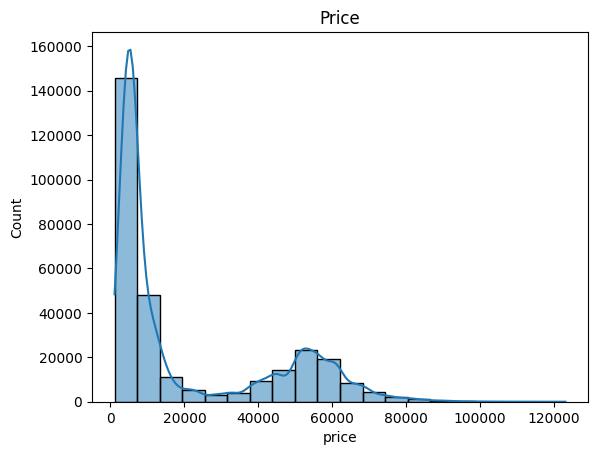

In [417]:
sns.histplot(df['price'], bins=20, kde=True).set(title='Price')

Based on the histogram plot, we can see that most of the flight having price less than 10k INR (Indian Rupee). But for few flight price is goes up to 120k INR, this probably the price of business class.

## 4.2 - Numerical Column

In [418]:
exploreNumCol(df, 'duration')

Mean duration = 12.22
Median duration = 11.25
Modus duration = 2.17
Min duration = 0.83
Max duration = 49.83
Skewness duration = 0.6028991297746269, data distribution is not normal


c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Duration')]

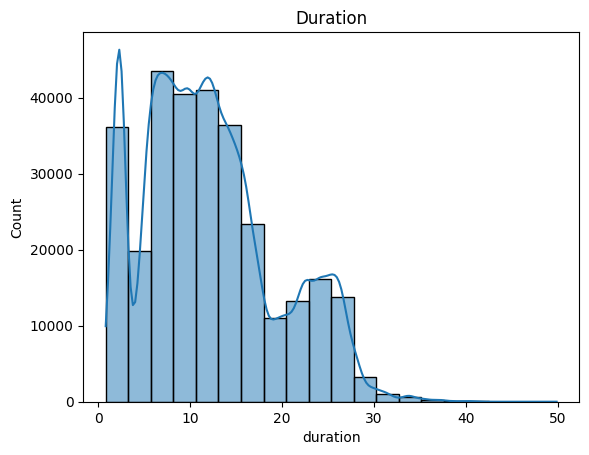

In [419]:
sns.histplot(df['duration'], bins=20, kde=True).set(title='Duration')

Based on the modus, most of the flight duration is at 2 hours. This dataset is data is mostly came from short flights between India city.

## 4.3 - Categorical Column

In [420]:
df_airlines = df.groupby(['airline']).agg(counts=('flight', 'count')).sort_values(by=['counts'], ascending=False)
df_airlines

,counts
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


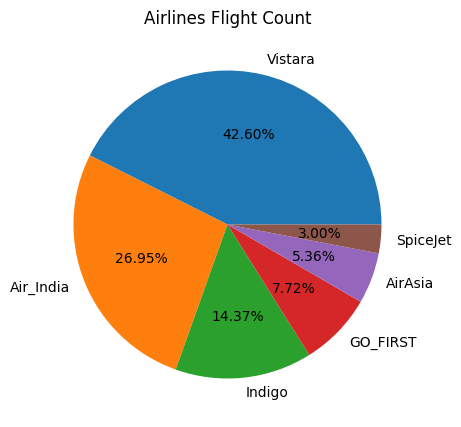

In [421]:
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))
ax.pie(df_airlines['counts'], labels=df_airlines['counts'].index, autopct='%.2f%%')
ax.set_title("Airlines Flight Count")
plt.show()

The flight is dominated by `Vistara` Airlines with more than 127k flights. Their biggest competitor is `Air India` with 80k flights.

In [422]:
df_stops = df.groupby(['stops']).agg(counts=('airline', 'count'))#.sort_values(by=['Profit'], ascending=False)
df_stops

,counts
stops,
one,250863
two_or_more,13286
zero,36004


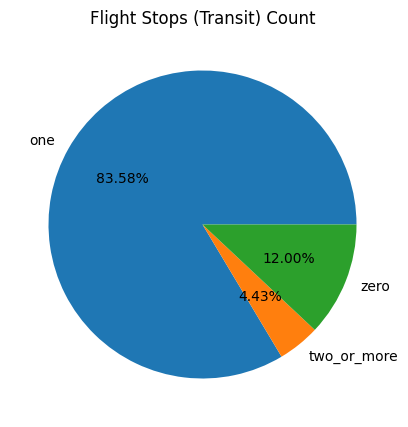

In [423]:
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))
ax.pie(df_stops['counts'], labels=df_stops['counts'].index, autopct='%.2f%%')
ax.set_title("Flight Stops (Transit) Count")
plt.show()

Most of flight on this dataset is having one transit. Only 12% of the data that is a direct flight.

                       price
departure_time              
Late_Night       9295.299387
Afternoon       18179.203331
Early_Morning   20370.676718
Evening         21232.361894
Morning         21630.760254
Night           23062.146808


c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categoric

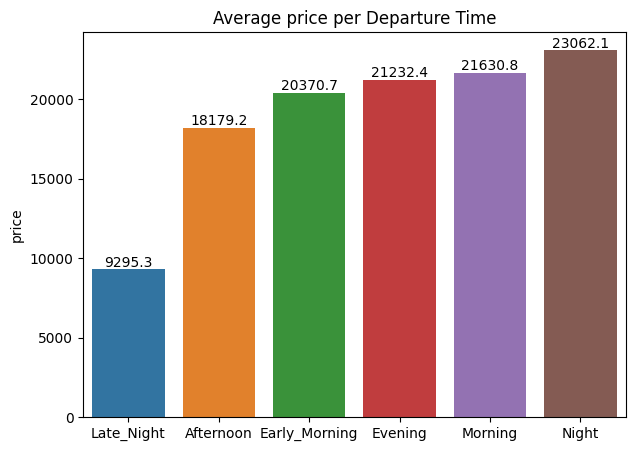

In [424]:
df_departure = df.groupby(['departure_time']).agg({'price':'mean'}).sort_values(by=['price'], ascending=True)
print(df_departure)

plt.subplots(figsize=(7, 5))
ax = sns.barplot(data=df_departure, x=df_departure.index.to_list(), y='price', orient='v')
ax.bar_label(ax.containers[0])
ax.set(title='Average price per Departure Time')
plt.show()

From the bar plot above we can see that Late Night ticket average price is cheapest compared to other time. Meanwhile night and morning flight have the most expensive average price.

c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

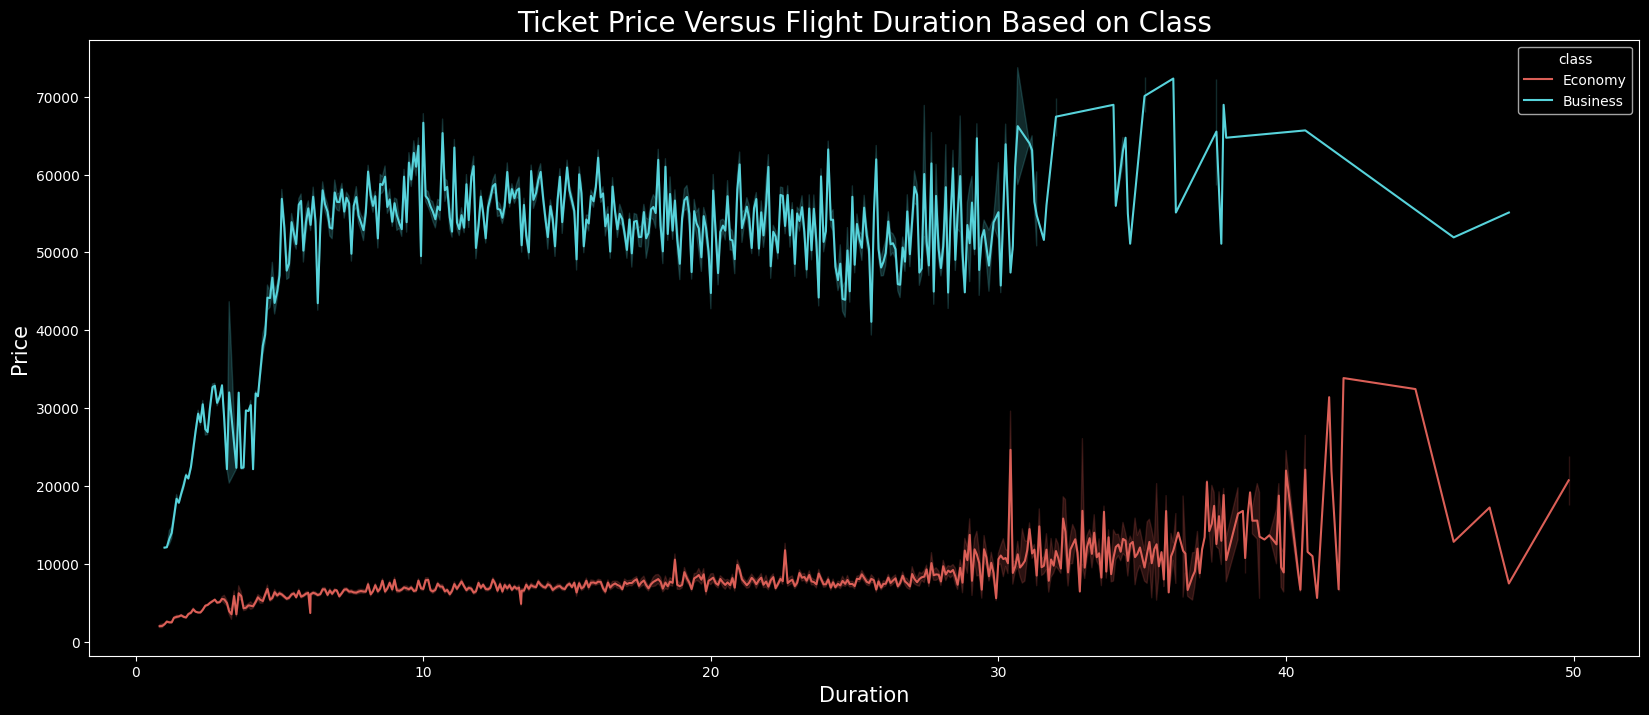

In [425]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x='duration', y='price', hue='class', palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

Based on the line graph above, we can see that as the flight duration increase the ticket price is also increases in both the Economy and Business classes.

c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

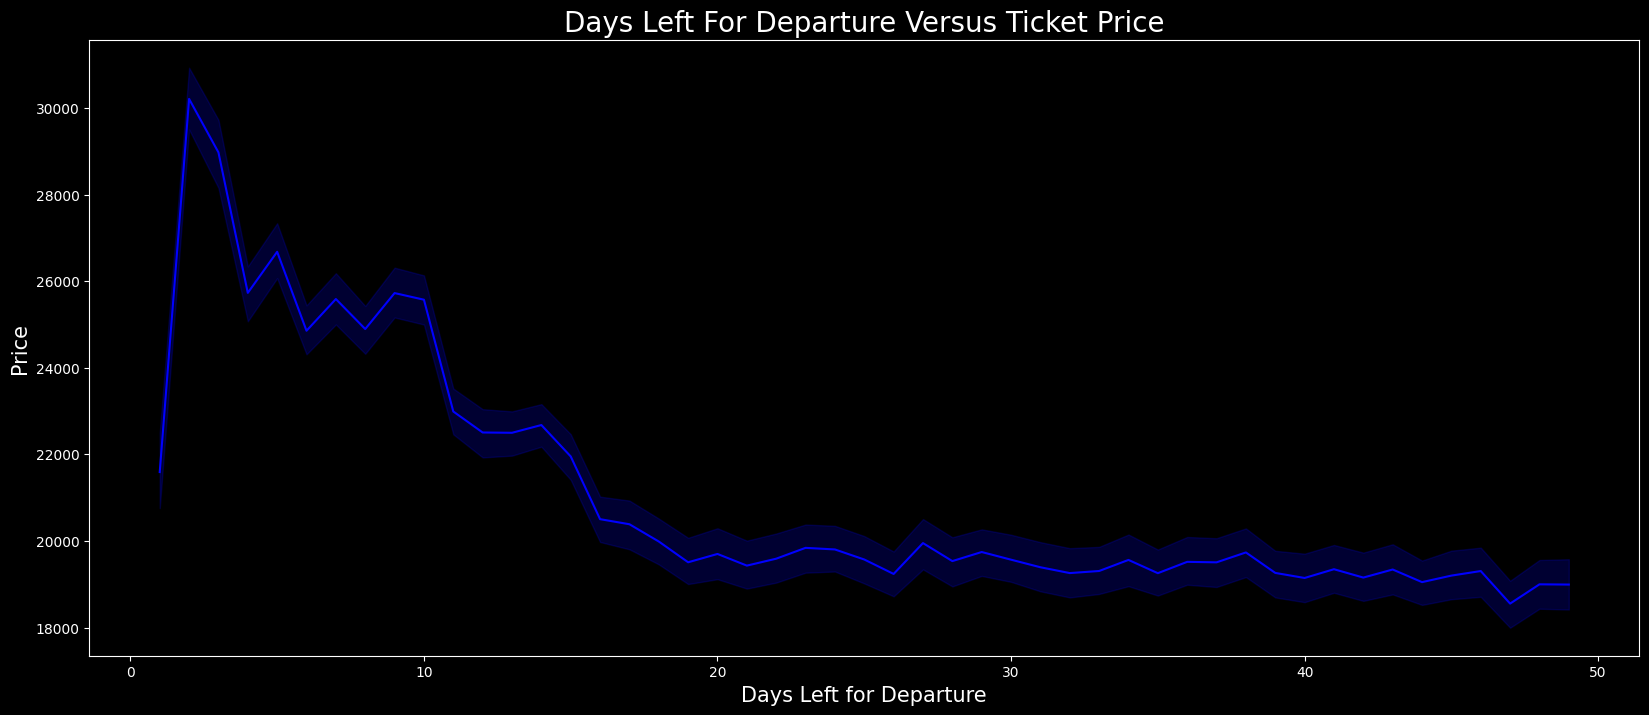

In [426]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x='days_left', y='price', color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()
plt.style.use('default')

As we can see above, when there are two days remaining for departure the ticket price is very high. And the more days remaining until departure the cheaper the ticket price is.

# 5 - Feature Engineering

## 5.1 - Feature Selection

In [380]:
df_formodel = df[['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']]
df_formodel

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [381]:
df_formodel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 25.2+ MB


We decided to not use flight code column because it has too many unique value and it has no correlation with the target column, price.

## 5.2 - Split Feature(X) and Target(y)

In [382]:
X = df_formodel.drop('price', axis=1)
y = df_formodel['price']

In [383]:
X.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1


Split all column except price as feature(X) and price as target(y).

## 5.3 - Split Train set and Test set

In [384]:
#Split train and test (80% Train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=21)
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)
print('y Train Size : ', y_train.shape)
print('y Test Size : ', y_test.shape)

Train Size :  (240122, 9)
Test Size :  (60031, 9)
y Train Size :  (240122,)
y Test Size :  (60031,)


In [385]:
X_train

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
280727,Vistara,Hyderabad,Evening,one,Morning,Bangalore,Business,15.00,10
123069,Air_India,Kolkata,Evening,one,Afternoon,Delhi,Economy,18.08,23
235621,Vistara,Mumbai,Evening,one,Night,Kolkata,Business,5.17,20
210271,Vistara,Delhi,Night,one,Morning,Mumbai,Business,11.58,34
212495,Vistara,Delhi,Afternoon,zero,Evening,Bangalore,Business,2.75,9
...,...,...,...,...,...,...,...,...,...
63856,GO_FIRST,Mumbai,Early_Morning,one,Evening,Kolkata,Economy,11.92,15
81968,Indigo,Mumbai,Afternoon,one,Evening,Chennai,Economy,4.92,35
140036,Air_India,Kolkata,Morning,one,Morning,Bangalore,Economy,25.50,33
202552,Vistara,Chennai,Afternoon,one,Night,Kolkata,Economy,10.25,48


Split train and test set with 80% for train-set data and 20% for test-set data.

## 5.4 - Handling Outlier

In [386]:
print('Distribution of column `duration`  : ', df_formodel['duration'].skew())
print('Distribution of column `days_left`  : ', df_formodel['days_left'].skew())

Distribution of column `duration`  :  0.6028991297746269
Distribution of column `days_left`  :  -0.03546434955066582


In [387]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df, bins=30) if variable is None else sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df) if variable is None else sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


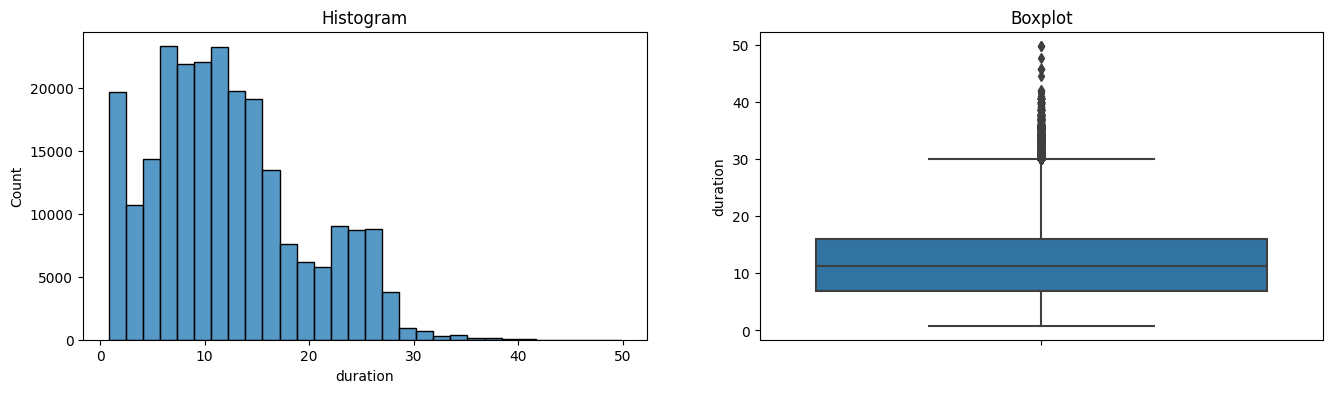

In [388]:
diagnostic_plots(X_train, 'duration')

c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


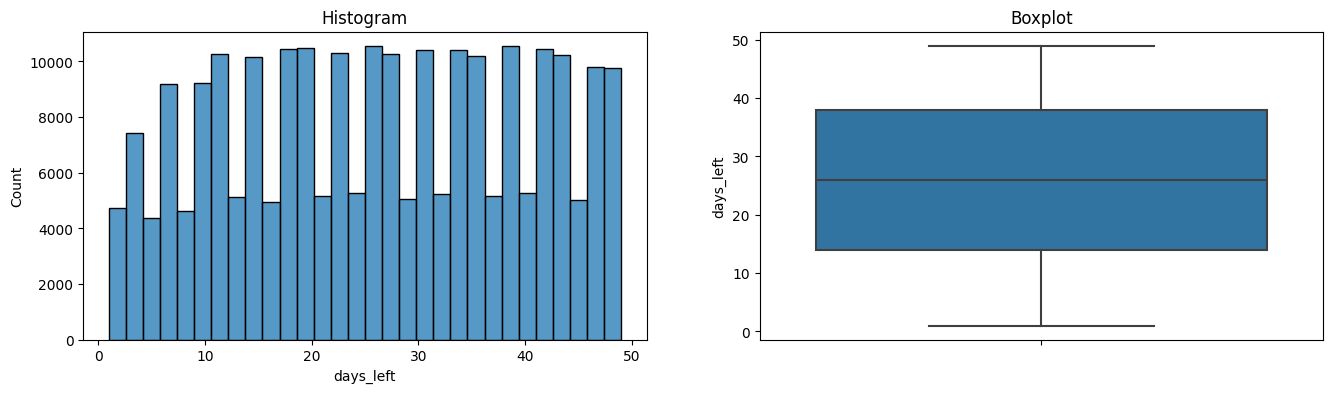

In [389]:
diagnostic_plots(X_train, 'days_left')

We found a few outliers in the flight duration, but we decide to not remove this outliers since it's an natural outliers. The flight duration can be very long if it need to stop/transit at more than two airport.

## 5.5 - Handling Missing Value

In [390]:
#Check X_train
X_train.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
dtype: int64

In [391]:
#Check X_test
X_test.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
dtype: int64

In [392]:
#Check y_train
y_train.isnull().sum()

0

In [393]:
#Check y_test
y_test.isnull().sum()

0

There is no missing value found on this dataset.

## 5.6 - Split Numerical and Categorical Column

In [394]:
X_train.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
280727,Vistara,Hyderabad,Evening,one,Morning,Bangalore,Business,15.00,10
123069,Air_India,Kolkata,Evening,one,Afternoon,Delhi,Economy,18.08,23
235621,Vistara,Mumbai,Evening,one,Night,Kolkata,Business,5.17,20
210271,Vistara,Delhi,Night,one,Morning,Mumbai,Business,11.58,34
212495,Vistara,Delhi,Afternoon,zero,Evening,Bangalore,Business,2.75,9


In [395]:
num_col_skew = ['duration']
num_col_normal = ['days_left']
cat_col_ordinal = ['stops']
cat_col_nominal = ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city', 'class']

In [396]:
X_train_num_s = X_train[num_col_skew]
X_train_num_n = X_train[num_col_normal]
X_train_cat_o = X_train[cat_col_ordinal]
X_train_cat_n = X_train[cat_col_nominal]

X_test_num_s = X_test[num_col_skew]
X_test_num_n = X_test[num_col_normal]
X_test_cat_o = X_test[cat_col_ordinal]
X_test_cat_n = X_test[cat_col_nominal]

## 5.7 - Feature Scaling

### 5.7.1 - Scaling Skew Data

In [397]:
#Scaling Numerical Column with Skew Data
scaler_mm = MinMaxScaler()
scaler_mm.fit(X_train_num_s)

MinMaxScaler()

In [398]:
X_train_num_s_scaled = scaler_mm.transform(X_train_num_s)
X_test_num_s_scaled = scaler_mm.transform(X_test_num_s)

### 5.7.2 - Scaling Normal Data

In [399]:
#Scaling Numerical Column with Normal Data
scaler_ss = StandardScaler()
scaler_ss.fit(X_train_num_n)

StandardScaler()

In [400]:
X_train_num_n_scaled = scaler_ss.transform(X_train_num_n)
X_test_num_n_scaled = scaler_ss.transform(X_test_num_n)

## 5.8 - Feature Encoding

### 5.8.1 - Encoding Ordinal

In [401]:
# Encoding Categorical Ordinal Column
od_encoder = OrdinalEncoder(categories=[['zero', 'one', 'two_or_more']])
od_encoder.fit(X_train_cat_o)

OrdinalEncoder(categories=[['zero', 'one', 'two_or_more']])

In [402]:
X_train_cat_o_encoded = od_encoder.transform(X_train_cat_o)
X_test_cat_o_encoded = od_encoder.transform(X_test_cat_o)

### 5.8.2 - Encoding Nominal

In [403]:
# Encoding Categorical Nominal Column
oh_encoder = OneHotEncoder(handle_unknown='ignore')
oh_encoder.fit(X_train_cat_n)

OneHotEncoder(handle_unknown='ignore')

In [404]:
X_train_cat_n_encoded = oh_encoder.transform(X_train_cat_n).toarray()
X_test_cat_n_encoded = oh_encoder.transform(X_test_cat_n).toarray()

## 5.9 Create Pipeline

In [137]:
num_skew_pipe = Pipeline([('num_skew_mv', SimpleImputer(strategy='mean')), ('num_skew_scaler', MinMaxScaler())])
num_normal_pipe = Pipeline([('num_normal_mv', SimpleImputer(strategy='mean')), ('num_normal_scaler', StandardScaler())])
cat_od_pipe = Pipeline([('cat_od_mv', SimpleImputer(strategy='most_frequent')), ('cat_od_pipe', OrdinalEncoder(categories=[['zero', 'one', 'two_or_more']]))])
cat_nom_pipe = Pipeline([('cat_nom_mv', SimpleImputer(strategy='most_frequent')), ('cat_nom_pipe', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num_skew_transformer', num_skew_pipe, num_col_skew),
    ('num_normal_transformer', num_normal_pipe, num_col_normal),
    ('cat_od_transformer', cat_od_pipe, cat_col_ordinal),
    ('cat_normal_transformer', cat_nom_pipe, cat_col_nominal)
])

# 6 - Model Definition

## 6.1 - KNN

In [138]:
pipeline_knn = Pipeline([('preprocessor', preprocessor), ('model_svm', KNeighborsRegressor(n_neighbors=3))])

## 6.2 - SVM

In [139]:
pipeline_svm = Pipeline([('preprocessor', preprocessor), ('model_svm', SVR(kernel='linear'))])

## 6.3 - Decision Tree

In [141]:
pipeline_dt = Pipeline([('preprocessor', preprocessor), ('model_dt', DecisionTreeRegressor(max_depth=4, random_state=21))])

## 6.4 - Random Forest

In [142]:
pipeline_rf = Pipeline([('preprocessor', preprocessor), ('model_rf', RandomForestRegressor(max_depth=4, random_state=21))])

## 6.5 - Ada Boost

In [143]:
pipeline_ab = Pipeline([('preprocessor', preprocessor), ('model_ab', AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), random_state=21))])

# 7 - Model Training

## 7.1 - KNN

In [144]:
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_skew_transformer',
                                                  Pipeline(steps=[('num_skew_mv',
                                                                   SimpleImputer()),
                                                                  ('num_skew_scaler',
                                                                   MinMaxScaler())]),
                                                  ['duration']),
                                                 ('num_normal_transformer',
                                                  Pipeline(steps=[('num_normal_mv',
                                                                   SimpleImputer()),
                                                                  ('num_normal_scaler',
                                                                   StandardScaler())]),
                                                  ['days_left']),
                                                 ('cat_od_transformer',
                                                  Pipeline(...
                                                                   OrdinalEncoder(categories=[['zero',
                                                                                               'one',
                                                                                               'two_or_more']]))]),
                                                  ['stops']),
                                                 ('cat_normal_transformer',
                                                  Pipeline(steps=[('cat_nom_mv',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_nom_pipe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['airline', 'source_city',
                                                   'departure_time',
                                                   'arrival_time',
                                                   'destination_city',
                                                   'class'])])),
                ('model_knn', KNeighborsRegressor(n_neighbors=3))])

## 7.2 - SVM

In [162]:
pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_skew_transformer',
                                                  Pipeline(steps=[('num_skew_mv',
                                                                   SimpleImputer()),
                                                                  ('num_skew_scaler',
                                                                   MinMaxScaler())]),
                                                  ['duration']),
                                                 ('num_normal_transformer',
                                                  Pipeline(steps=[('num_normal_mv',
                                                                   SimpleImputer()),
                                                                  ('num_normal_scaler',
                                                                   StandardScaler())]),
                                                  ['days_left']),
                                                 ('cat_od_transformer',
                                                  Pipeline(...
                                                                   OrdinalEncoder(categories=[['zero',
                                                                                               'one',
                                                                                               'two_or_more']]))]),
                                                  ['stops']),
                                                 ('cat_normal_transformer',
                                                  Pipeline(steps=[('cat_nom_mv',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_nom_pipe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['airline', 'source_city',
                                                   'departure_time',
                                                   'arrival_time',
                                                   'destination_city',
                                                   'class'])])),
                ('model_svm', SVR(kernel='linear'))])

## 7.3 - Decision Tree

In [145]:
pipeline_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_skew_transformer',
                                                  Pipeline(steps=[('num_skew_mv',
                                                                   SimpleImputer()),
                                                                  ('num_skew_scaler',
                                                                   MinMaxScaler())]),
                                                  ['duration']),
                                                 ('num_normal_transformer',
                                                  Pipeline(steps=[('num_normal_mv',
                                                                   SimpleImputer()),
                                                                  ('num_normal_scaler',
                                                                   StandardScaler())]),
                                                  ['days_left']),
                                                 ('cat_od_transformer',
                                                  Pipeline(...
                                                                   OrdinalEncoder(categories=[['zero',
                                                                                               'one',
                                                                                               'two_or_more']]))]),
                                                  ['stops']),
                                                 ('cat_normal_transformer',
                                                  Pipeline(steps=[('cat_nom_mv',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_nom_pipe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['airline', 'source_city',
                                                   'departure_time',
                                                   'arrival_time',
                                                   'destination_city',
                                                   'class'])])),
                ('model_dt',
                 DecisionTreeRegressor(max_depth=4, random_state=21))])

## 7.4 - Random Forest

In [146]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_skew_transformer',
                                                  Pipeline(steps=[('num_skew_mv',
                                                                   SimpleImputer()),
                                                                  ('num_skew_scaler',
                                                                   MinMaxScaler())]),
                                                  ['duration']),
                                                 ('num_normal_transformer',
                                                  Pipeline(steps=[('num_normal_mv',
                                                                   SimpleImputer()),
                                                                  ('num_normal_scaler',
                                                                   StandardScaler())]),
                                                  ['days_left']),
                                                 ('cat_od_transformer',
                                                  Pipeline(...
                                                                   OrdinalEncoder(categories=[['zero',
                                                                                               'one',
                                                                                               'two_or_more']]))]),
                                                  ['stops']),
                                                 ('cat_normal_transformer',
                                                  Pipeline(steps=[('cat_nom_mv',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_nom_pipe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['airline', 'source_city',
                                                   'departure_time',
                                                   'arrival_time',
                                                   'destination_city',
                                                   'class'])])),
                ('model_rf',
                 RandomForestRegressor(max_depth=4, random_state=21))])

## 7.5 - Ada Boost

In [147]:
pipeline_ab.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_skew_transformer',
                                                  Pipeline(steps=[('num_skew_mv',
                                                                   SimpleImputer()),
                                                                  ('num_skew_scaler',
                                                                   MinMaxScaler())]),
                                                  ['duration']),
                                                 ('num_normal_transformer',
                                                  Pipeline(steps=[('num_normal_mv',
                                                                   SimpleImputer()),
                                                                  ('num_normal_scaler',
                                                                   StandardScaler())]),
                                                  ['days_left']),
                                                 ('cat_od_transformer',
                                                  Pipeline(...
                                                                                               'two_or_more']]))]),
                                                  ['stops']),
                                                 ('cat_normal_transformer',
                                                  Pipeline(steps=[('cat_nom_mv',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_nom_pipe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['airline', 'source_city',
                                                   'departure_time',
                                                   'arrival_time',
                                                   'destination_city',
                                                   'class'])])),
                ('model_ab',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                                   random_state=21))])

# 8 - Model Evaluation

## 8.1 - KNN Evaluation

In [148]:
y_pred_train_knn = pipeline_knn.predict(X_train)
y_pred_test_knn = pipeline_knn.predict(X_test)

In [150]:
print('MAE KNN - Train-Set : ', mean_absolute_error(y_train, y_pred_train_knn))
print('MAE KNN - Test-Set : ', mean_absolute_error(y_test, y_pred_test_knn))
print('')
print('R2S KNN - Train-Set : ', r2_score(y_train, y_pred_train_knn))
print('R2S KNN - Test-Set : ', r2_score(y_test, y_pred_test_knn))

MAE KNN - Train-Set :  1394.5163819502861
MAE KNN - Test-Set :  2008.6845907392292

R2S KNN - Train-Set :  0.9826625254802528
R2S KNN - Test-Set :  0.9667073131789661


In [152]:
cross_val_knn = cross_val_score(pipeline_knn, X_train, y_train, cv=5, scoring="r2")
print('R2 All - Cross Validation  : ', cross_val_knn)
print('R2 Mean - Cross Validation : ', cross_val_knn.mean())

R2 All - Cross Validation  :  [0.96662547 0.96705382 0.96633131 0.96640176 0.96665078]
R2 Mean - Cross Validation :  0.9666126265902175


The result of `KNN` model is very good R2 Score which is 96% at cross validation mean, this is probable the best result compared to other model we use. Based on the MAE result, on train-set we get 1394 means the model can predict price with ± 1394 within the real price on train-set and ± 2008 within the real price on test-set.

## 8.2 - SVM Evaluation

In [163]:
y_pred_train_svm = pipeline_svm.predict(X_train)
y_pred_test_svm = pipeline_svm.predict(X_test)

In [164]:
print('MAE SVM - Train-Set : ', mean_absolute_error(y_train, y_pred_train_svm))
print('MAE SVM - Test-Set : ', mean_absolute_error(y_test, y_pred_test_svm))
print('')
print('R2S SVM - Train-Set : ', r2_score(y_train, y_pred_train_svm))
print('R2S SVM - Test-Set : ', r2_score(y_test, y_pred_test_svm))

MAE SVM - Train-Set :  4315.913255532506
MAE SVM - Test-Set :  4394.51575440441

R2S SVM - Train-Set :  0.8973886424867115
R2S SVM - Test-Set :  0.8958120379929108


In [166]:
cross_val_svm = cross_val_score(pipeline_svm, X_train, y_train, cv=5, scoring="r2")
print('R2 All - Cross Validation  : ', cross_val_svm)
print('R2 Mean - Cross Validation : ', cross_val_svm.mean())

R2 All - Cross Validation  :  [0.89369982 0.89192629 0.89382853 0.89419769 0.8947031 ]
R2 Mean - Cross Validation :  0.8936710855745928


The result of `SVM` model is giving a good R2 Score on cross validation mean with 89.3%, but the result is not as good as `KNN`. Even the `SVM` MAE is very high compared to `KNN` MAE at ± 4300 for both train-set and test-set. Its value is twice as `KNN` MAE which showing a higher error range for prediction.

## 8.3 - Decision Tree Evaluation

In [153]:
y_pred_train_dt = pipeline_dt.predict(X_train)
y_pred_test_dt = pipeline_dt.predict(X_test)

In [154]:
print('MAE DT - Train-Set : ', mean_absolute_error(y_train, y_pred_train_dt))
print('MAE DT - Test-Set : ', mean_absolute_error(y_test, y_pred_test_dt))
print('')
print('R2S DT - Train-Set : ', r2_score(y_train, y_pred_train_dt))
print('R2S DT - Test-Set : ', r2_score(y_test, y_pred_test_dt))

MAE DT - Train-Set :  3330.150404862261
MAE DT - Test-Set :  3361.619342935511

R2S DT - Train-Set :  0.9387966531228044
R2S DT - Test-Set :  0.9388963422506287


In [155]:
cross_val_dt = cross_val_score(pipeline_dt, X_train, y_train, cv=5, scoring="r2")
print('R2 All - Cross Validation  : ', cross_val_dt)
print('R2 Mean - Cross Validation : ', cross_val_dt.mean())

R2 All - Cross Validation  :  [0.93875784 0.93856569 0.93784322 0.93879705 0.93935369]
R2 Mean - Cross Validation :  0.9386634974045572


The result of `Decision Tree` model for R2 Score on cross validation mean is 93.8%, this is very good result. Although it is not as good as `KNN` result, but the difference between its MAE Train and MAE Test is very little at 3330 for train-set and 3361 for test-set. This means the model error range for prediction in train-set and test-set is not much different. Also this model `predict time` is very fast with ±0.3 sec to predict more than 30k data-test.

## 8.4 - Random Forest Evaluation

In [156]:
y_pred_train_rf = pipeline_rf.predict(X_train)
y_pred_test_rf = pipeline_rf.predict(X_test)

In [157]:
print('MAE RF - Train-Set : ', mean_absolute_error(y_train, y_pred_train_rf))
print('MAE RF - Test-Set : ', mean_absolute_error(y_test, y_pred_test_rf))
print('')
print('R2S RF - Train-Set : ', r2_score(y_train, y_pred_train_rf))
print('R2S RF - Test-Set : ', r2_score(y_test, y_pred_test_rf))

MAE RF - Train-Set :  3322.425291322137
MAE RF - Test-Set :  3355.9127677835663

R2S RF - Train-Set :  0.9391248808194461
R2S RF - Test-Set :  0.939136917801661


In [158]:
cross_val_rf = cross_val_score(pipeline_rf, X_train, y_train, cv=5, scoring="r2")
print('R2 All - Cross Validation  : ', cross_val_rf)
print('R2 Mean - Cross Validation : ', cross_val_rf.mean())

R2 All - Cross Validation  :  [0.93909418 0.93877082 0.93837244 0.93920229 0.93988921]
R2 Mean - Cross Validation :  0.9390657867646643


The result of `Random Forest` model for R2 Score on cross validation mean is 93.9%, this is very good result and slightly better than `Decision Tree`. But it's also not as good as `KNN` result. Same with `Decision Tree` the difference between its MAE Train and MAE Test is very little at 3322 for train-set and 3355 for test-set. This means the model error range for prediction in train-set and test-set is not much different. Also this model `predict time` is very fast with ±1.2 sec to predict more than 30k data-test.

## 8.5 - Ada Boost Evaluation

In [159]:
y_pred_train_ab = pipeline_ab.predict(X_train)
y_pred_test_ab = pipeline_ab.predict(X_test)

In [160]:
print('MAE Linear - Train-Set : ', mean_absolute_error(y_train, y_pred_train_ab))
print('MAE Linear - Test-Set : ', mean_absolute_error(y_test, y_pred_test_ab))
print('')
print('R2S Linear - Train-Set : ', r2_score(y_train, y_pred_train_ab))
print('R2S Linear - Test-Setre : ', r2_score(y_test, y_pred_test_ab))

MAE Linear - Train-Set :  3971.0705461057373
MAE Linear - Test-Set :  3995.4720906397956

R2S Linear - Train-Set :  0.9263787285643204
R2S Linear - Test-Set :  0.9266656173560598


In [161]:
cross_val_ab = cross_val_score(pipeline_ab, X_train, y_train, cv=5, scoring="r2")
print('R2 All - Cross Validation  : ', cross_val_ab)
print('R2 Mean - Cross Validation : ', cross_val_ab.mean())

R2 All - Cross Validation  :  [0.92861772 0.9326036  0.93181129 0.92950966 0.92881811]
R2 Mean - Cross Validation :  0.9302720755507092


For `Boosting` model we use `Ada Boost` with `Decision Tree` as its estimator. The result is also good with 93% R2 Score on cross validation mean. It's R2 Score is only slightly below `Decision Tree` and `Random Forest`. But, its MAE is very high with 3971 on train-set and 3995 on test-set. This is worst than the two model before.

# 9 - Model Improvement

Based on the model evaluation result at point 8, we will try to improve `Decision Tree` and `Random Forest` model as this two model is the second best model. Eventhough this two model result is not as good as `KNN` but but it's predict time is much faster than `KNN`. So, for resource efficiency we decide to improve this two model and use the one with the best result.

## 9.1 - Decision Tree Improvement

In [258]:
max_depth = [2, 3, 4, 5]
min_samples_split = [2, 3, 4, 5]
min_samples_leaf = [1, 2, 3]
random_state = [21]
grid_search_params_dt = {
    'model_dt__max_depth': max_depth, 
    'model_dt__min_samples_split': min_samples_split, 
    'model_dt__min_samples_leaf': min_samples_leaf, 
    'model_dt__random_state':random_state}

In [259]:
dt_gridcv = GridSearchCV(estimator=pipeline_dt, param_grid=grid_search_params_dt, cv=5, n_jobs=-1, scoring='r2')
dt_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_skew_transformer',
                                                                         Pipeline(steps=[('num_skew_mv',
                                                                                          SimpleImputer()),
                                                                                         ('num_skew_scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['duration']),
                                                                        ('num_normal_transformer',
                                                                         Pipeline(steps=[('num_normal_mv',
                                                                                          SimpleImputer()),
                                                                                         ('num_normal_scaler',
                                                                                          StandardScaler())]),
                                                                         ['days_left']),
                                                                        ('c...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['airline',
                                                                          'source_city',
                                                                          'departure_time',
                                                                          'arrival_time',
                                                                          'destination_city',
                                                                          'class'])])),
                                       ('model_dt',
                                        DecisionTreeRegressor(max_depth=4,
                                                              random_state=21))]),
             n_jobs=-1,
             param_grid={'model_dt__max_depth': [2, 3, 4, 5],
                         'model_dt__min_samples_leaf': [1, 2, 3],
                         'model_dt__min_samples_split': [2, 3, 4, 5],
                         'model_dt__random_state': [21]},
             scoring='r2')

In [260]:
print("Best parameters:", dt_gridcv.best_params_)
print("Best R2 score:", dt_gridcv.best_score_)

Best parameters: {'model_dt__max_depth': 5, 'model_dt__min_samples_leaf': 1, 'model_dt__min_samples_split': 2, 'model_dt__random_state': 21}
Best R2 score: 0.9421414279575764


In [261]:
dt_gridcv_best = dt_gridcv.best_estimator_

In [268]:
y_pred_train_best_dt = dt_gridcv_best.predict(X_train)
y_pred_test_best_dt = dt_gridcv_best.predict(X_test)

In [263]:
print('MAE Best DT - Train-Set : ', mean_absolute_error(y_train, y_pred_train_best_dt))
print('MAE Best DT - Test-Set : ', mean_absolute_error(y_test, y_pred_test_best_dt))
print('')
print('R2S Best DT - Train-Set : ', r2_score(y_train, y_pred_train_best_dt))
print('R2S Best DT - Test-Set : ', r2_score(y_test, y_pred_test_best_dt))

MAE Best DT - Train-Set :  3200.069766452731
MAE Best DT - Test-Set :  3235.457911788717

R2S Best DT - Train-Set :  0.9423782593070531
R2S Best DT - Test-Set :  0.9422917428432689


In [264]:
cross_val_best_dt = cross_val_score(dt_gridcv_best, X_train, y_train, cv=5, scoring="r2")
print('R2 Best DT All - Cross Validation  : ', cross_val_best_dt)
print('R2 Best DT Mean - Cross Validation : ', cross_val_best_dt.mean())

R2 Best DT All - Cross Validation  :  [0.94216572 0.94212974 0.9415185  0.94204826 0.94284491]
R2 Best DT Mean - Cross Validation :  0.9421414279575764


- After hyperparameter tuning on `Decision Tree` model, we use the best estimator and got a better R2 Score of cross validation mean.

- Before improvement the R2 Score is at 93.8% and it goes up to 94.2% after the improvement. 

- Also we got lower MAE which is 3200 for train-set and 3235 for test-set, this is better than the baseline model before improvement.

- Its predict time is only increased by 0.1sec become 0.4sec from 0.3sec, this is still considered as a very good predict time.

## 9.2 - Random Forest Improvement

In [251]:
n_estimators = [100, 200]
max_depth = [4, 5]
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2]
random_state = [21]
grid_search_params_rf = {
    'model_rf__n_estimators': n_estimators, 
    'model_rf__max_depth': max_depth, 
    'model_rf__min_samples_split': min_samples_split, 
    'model_rf__min_samples_leaf': min_samples_leaf, 
    'model_rf__random_state':random_state}

In [252]:
rf_gridcv = GridSearchCV(estimator=pipeline_rf, param_grid=grid_search_params_rf, cv=3, n_jobs=-1, scoring='r2')
rf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_skew_transformer',
                                                                         Pipeline(steps=[('num_skew_mv',
                                                                                          SimpleImputer()),
                                                                                         ('num_skew_scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['duration']),
                                                                        ('num_normal_transformer',
                                                                         Pipeline(steps=[('num_normal_mv',
                                                                                          SimpleImputer()),
                                                                                         ('num_normal_scaler',
                                                                                          StandardScaler())]),
                                                                         ['days_left']),
                                                                        ('c...
                                                                         ['airline',
                                                                          'source_city',
                                                                          'departure_time',
                                                                          'arrival_time',
                                                                          'destination_city',
                                                                          'class'])])),
                                       ('model_rf',
                                        RandomForestRegressor(max_depth=4,
                                                              random_state=21))]),
             n_jobs=-1,
             param_grid={'model_rf__max_depth': [4, 5],
                         'model_rf__min_samples_leaf': [1, 2],
                         'model_rf__min_samples_split': [2, 3, 4],
                         'model_rf__n_estimators': [100, 200],
                         'model_rf__random_state': [21]},
             scoring='r2')

In [253]:
print("Best parameters:", rf_gridcv.best_params_)
print("Best R2 score:", rf_gridcv.best_score_)

Best parameters: {'model_rf__max_depth': 5, 'model_rf__min_samples_leaf': 2, 'model_rf__min_samples_split': 2, 'model_rf__n_estimators': 100, 'model_rf__random_state': 21}
Best R2 score: 0.9430532642408789


In [254]:
rf_gridcv_best = rf_gridcv.best_estimator_

In [267]:
y_pred_train_best_rf = rf_gridcv_best.predict(X_train)
y_pred_test_best_rf = rf_gridcv_best.predict(X_test)

In [256]:
print('MAE Best RF - Train-Set : ', mean_absolute_error(y_train, y_pred_train_best_rf))
print('MAE Best RF - Test-Set : ', mean_absolute_error(y_test, y_pred_test_best_rf))
print('')
print('R2S Best RF - Train-Set : ', r2_score(y_train, y_pred_train_best_rf))
print('R2S Best RF - Test-Set : ', r2_score(y_test, y_pred_test_best_rf))

MAE Best RF - Train-Set :  3163.8904882454826
MAE Best RF - Test-Set :  3197.6020621663783

R2S Best RF - Train-Set :  0.9431544602013565
R2S Best RF - Test-Set :  0.9431290631678118


In [257]:
cross_val_best_rf = cross_val_score(rf_gridcv_best, X_train, y_train, cv=5, scoring="r2")
print('R2 Best RF All - Cross Validation  : ', cross_val_best_rf)
print('R2 Best RF Mean - Cross Validation : ', cross_val_best_rf.mean())

R2 Best RF All - Cross Validation  :  [0.94295748 0.9429109  0.94260223 0.9431152  0.94359225]
R2 Best RF Mean - Cross Validation :  0.9430356137767258


- After hyperparameter tuning on `Random Forest` model, we use the best estimator and got a better R2 Score of cross validation mean.

- Before improvement the R2 Score is at 93.9% and it goes up to 94.3% after the improvement. 

- Also we got lower MAE which is 3163 for train-set and 3197 for test-set, this is better than the baseline model before improvement.

- Its predict time is only increased by 0.2sec become 1.4sec from 1.2sec, this is still considered as a very good predict time.

# 10 - Model Analysis

In [274]:
all_reports = {}
index_reports = ['Cross Val R2 Mean', 'Train - MAE', 'Test - MAE', 'Train - R2 Score',  'Test - R2 Score', 'Model Train Time', 'Model Predict Time']

base_knn = {
    'Cross Val R2 Mean' : cross_val_knn.mean(),
    'Train - MAE' : mean_absolute_error(y_train, y_pred_train_knn),
	'Test - MAE' : mean_absolute_error(y_test, y_pred_test_knn),
    'Train - R2 Score' : r2_score(y_train, y_pred_train_knn),
    'Test - R2 Score' : r2_score(y_test, y_pred_test_knn),
    'Model Train Time' : '0.5s',
    'Model Predict Time' : '10m 16s'
}

base_svm = {
    'Cross Val R2 Mean' : cross_val_svm.mean(),
    'Train - MAE' : mean_absolute_error(y_train, y_pred_train_svm),
	'Test - MAE' : mean_absolute_error(y_test, y_pred_test_svm),
    'Train - R2 Score' : r2_score(y_train, y_pred_train_svm),
    'Test - R2 Score' : r2_score(y_test, y_pred_test_svm),
    'Model Train Time' : '131m 4s',
    'Model Predict Time' : '58m 2s'
}

base_dt = {
    'Cross Val R2 Mean' : cross_val_dt.mean(),
    'Train - MAE' : mean_absolute_error(y_train, y_pred_train_dt),
	'Test - MAE' : mean_absolute_error(y_test, y_pred_test_dt),
    'Train - R2 Score' : r2_score(y_train, y_pred_train_dt),
    'Test - R2 Score' : r2_score(y_test, y_pred_test_dt),
    'Model Train Time' : '0.8s',
    'Model Predict Time' : '0.3s'
}

base_rf = {
    'Cross Val R2 Mean' : cross_val_rf.mean(),
    'Train - MAE' : mean_absolute_error(y_train, y_pred_train_rf),
	'Test - MAE' : mean_absolute_error(y_test, y_pred_test_rf),
    'Train - R2 Score' : r2_score(y_train, y_pred_train_rf),
    'Test - R2 Score' : r2_score(y_test, y_pred_test_rf),
    'Model Train Time' : '26s',
    'Model Predict Time' : '1.2s'
}

base_ab = {
    'Cross Val R2 Mean' : cross_val_dt.mean(),
    'Train - MAE' : mean_absolute_error(y_train, y_pred_train_dt),
	'Test - MAE' : mean_absolute_error(y_test, y_pred_test_dt),
    'Train - R2 Score' : r2_score(y_train, y_pred_train_dt),
    'Test - R2 Score' : r2_score(y_test, y_pred_test_dt),
    'Model Train Time' : '10s',
    'Model Predict Time' : '1s'
}

dt_improvement = {
    'Cross Val R2 Mean' : cross_val_best_dt.mean(),
    'Train - MAE' : mean_absolute_error(y_train, y_pred_train_best_dt),
	'Test - MAE' : mean_absolute_error(y_test, y_pred_test_best_dt),
    'Train - R2 Score' : r2_score(y_train, y_pred_train_best_dt),
    'Test - R2 Score' : r2_score(y_test, y_pred_test_best_dt),
    'Model Train Time' : '40s (Tuning)',
    'Model Predict Time' : '0.4s'
}

rf_improvement = {
    'Cross Val R2 Mean' : cross_val_best_rf.mean(),
    'Train - MAE' : mean_absolute_error(y_train, y_pred_train_best_rf),
	'Test - MAE' : mean_absolute_error(y_test, y_pred_test_best_rf),
    'Train - R2 Score' : r2_score(y_train, y_pred_train_best_rf),
    'Test - R2 Score' : r2_score(y_test, y_pred_test_best_rf),
    'Model Train Time' : '8m 28s (Tuning)',
    'Model Predict Time' : '1.4s'
}

In [275]:
all_reports["Base - KNN"] = base_knn
all_reports["Base - SVM"] = base_svm
all_reports["Base - Decision Tree"] = base_dt
all_reports["Base - Random Forest"] = base_rf
all_reports["Base - AdaBoost (DT)"] = base_ab
all_reports["Improvement - DT"] = dt_improvement
all_reports["Improvement - RF"] = rf_improvement
df_report = pd.DataFrame(all_reports, index=index_reports)
df_report = df_report.transpose()
df_report

,Cross Val R2 Mean,Train - MAE,Test - MAE,Train - R2 Score,Test - R2 Score,Model Train Time,Model Predict Time
Base - KNN,0.966613,1394.516382,2008.684591,0.982663,0.966707,0.5s,10m 16s
Base - SVM,0.893671,4315.913256,4394.515754,0.897389,0.895812,131m 4s,58m 2s
Base - Decision Tree,0.938663,3330.150405,3361.619343,0.938797,0.938896,0.8s,0.3s
Base - Random Forest,0.939066,3322.425291,3355.912768,0.939125,0.939137,26s,1.2s
Base - AdaBoost (DT),0.938663,3330.150405,3361.619343,0.938797,0.938896,10s,1s
Improvement - DT,0.942141,3200.069766,3235.457912,0.942378,0.942292,40s (Tuning),0.4s
Improvement - RF,0.943036,3163.890488,3197.602062,0.943154,0.943129,8m 28s (Tuning),1.4s


Above are the result of model evaluation and model improvement.

- From all five baseline model, `KNN` model give the best result compared to the other four with 96% R2 Score of Cross Validation Mean. How ever this model predict time is more than 10 mins even with only base parameter. So we will choose our second best model with lower predict time which is `Decision Tree` and `Random Forest` to improve. Both of this still have 93% R2 Score of Cross Validation Mean as baseline model but much less resource needed, so we can say this model is the most efficient.

- After Hyperparameter Tuning, The result of `Decision Tree` is 94.2% R2 Score of Cross Validation Mean, this is a bit better than the baseline model which only give 93.8% R2 Score. Then `Random Forest` result after hyperparameter tuning is 94.3% R2 Score of Cross Validation Mean, this is also a bit better than its baseline model which only have 93.9% R2 Score.

- Based on the R2 Score of Cross Validation mean between `Decision Tree Improvement` and `Random Forest Improvement` we decide to define **`Random Forest Improvement`** as the **best model** to use. Because `Random Forest Improvement` has a better R2 Score of Cross Validation Mean. Although `Random Forest Improvement` predict time is longer than `Decision Tree Improvement` but the difference between the two is only 1 second and `Random Forest Improvement` also has better MAE at 3200 for train-set and 3163 for test-set.

# 11 - Conclusion

`Model Conclusion`
- Based on the model Analysis, we define `Random Forest Improvement` as the best model we will use. Because `Random Forest Improvement` give us the best R2 Score of Cross Validation Mean result at 94.3%. It also have smaller MAE compared to `Decision Tree Improvement` which is 3163 on train-set and 3197 on test-set. The resource (time, processor) needed for predict is also good, only 1.4sec.

- `Random Forest Improvement` R2 Score on train-set is 94.3% and R2 Score on test-set is also 94.3%, so the model result is `GoodFit`.

`Strength` and `Weakness`
- `Strength` of this model is it can give a very good result which is 94.3% R2 Score with only 1.4sec time needed to predict more than 60k data.
- `Weakness` the MAE score is still too high if compared to the other model which is `KNN` model. So the model can't predict as good as `KNN` model.

`Future Improvement`
- For future improvement, I suggest to try using `KNN` model but with less data. We can take 10~20% sample data from the dataset since the dataset has more than 300k data, then train - predict it using `KNN` so it will not need as many time as it is now. Because `KNN` result is the best, but it weakness is it need too many resource which time and processor.

`Business Insight`
- As for general public this model can help traveler to predict their ticket price. For example after they choose their origin and destination, they can predict the price based on airlines they choose. They can also try to change days left until the flight schedule to check wether the ticket price is cheaper if they bought it long before the flight schedule.

- As for airlines, this model can help to evaluate their ticket price, compare it with their competitor. To keep tracking with the competitor price and service. Is their price is still the best what they can give, or they need to reduce or increase the ticket price.

# 12 - Model Saving

In [212]:
#MODEL
with open('best_model_dt.pkl', 'wb') as file_1:
    pickle.dump(dt_gridcv_best, file_1)

#NUMERICAL
with open('list_num_column_skew.txt', 'wb') as file_2:
    pickle.dump(num_col_skew, file_2)

with open('list_num_column_normal.txt', 'wb') as file_3:
    pickle.dump(num_col_normal, file_3)

#CATEGORICAL
with open('list_cat_column_ordinal.txt', 'wb') as file_4:
    pickle.dump(cat_col_ordinal, file_4)

with open('list_cat_column_nominal.txt', 'wb') as file_5:
    pickle.dump(cat_col_nominal, file_5)

# 13 - Conceptual Problem

## 13.1 - Explain the background of bagging and how bagging works.

Bagging is short for Bootstrap AGGregating, is an ensemble machine learning technique that aims to improve the stability and accuracy of a predictive model. It works by creating multiple subsets of the training data through a process called bootstrapping and then training a separate base model (often decision trees) on each of these subsets. The predictions from each model are then combined, usually by averaging for regression tasks or by majority voting for classification tasks.
- `Bootstrapping` : Bagging starts by creating multiple random subsets of the original training dataset.

- `Base Model Training` : For each of the bootstrapped subsets, a separate base model is trained.

- `Predictions` : Once all base models are trained, they can be used to make predictions on new, unseen data.

- `Aggregation` : The final prediction is obtained by aggregating the predictions of all the base models.

## 13.2 - Explain the difference in how the Random Forest algorithm works and the boosting algorithm you chose.

- In `Random Forest` each model is built independently (parallel) but in `AdaBoost` new models are influenced by the performance of previously built models (sequential)

- `Random Forest` train multiple models independently on different subsets of the training data while `AdaBoost` train using data that was misclassified by the previous model.

- The predictions of individual models in `Random Forest` are combined by averaging (for regression) or by majority voting (for classification) while in `AdaBoost` the prediction of individual models are combined using weighted averaging.

## 13.3 - Explain what is meant by Cross Validation.

Cross Validation is a technique to estimate model performance on unseen data. The basic idea behind cross-validation is to divide your dataset into multiple subsets and then use these subsets for both training and testing. The most common form of cross-validation is k-fold cross-validation, which involves the following steps :
1. Randomly split your entire train set into k number of folds (subsets).

2. For each fold in your train set, build your model on k–1 folds of the train set. Then, test the model against validation set to check the effectiveness for k-th fold.

3. Repeat these 2 steps until each of the k-folds has served as the validation set.

4. The average of your k accuracy is called the Cross Validation accuracy and will serve as your performance metric for the model.

5. Hint : In general, most common of K value is 5 or 10